## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Load Test Data and Models

In [2]:
# Load test data (unseen data)
X_test = pd.read_csv('data/X_test_scaled.csv')
y_test = pd.read_csv('data/y_test.csv').values.ravel()

# Load trained models
models = {
    'Naive Bayes': joblib.load('models/Naive_Bayes.pkl'),
    'SVM': joblib.load('models/SVM.pkl'),
    'Decision Tree': joblib.load('models/Decision_Tree.pkl')
}

print("✓ Test data loaded!")
print(f"  Test samples: {len(X_test)}")
print(f"  Features: {X_test.shape[1]}")

print("\n✓ Models loaded:")
for name in models.keys():
    print(f"  • {name}")

✓ Test data loaded!
  Test samples: 154
  Features: 8

✓ Models loaded:
  • Naive Bayes
  • SVM
  • Decision Tree


## Result Storage

In [3]:
# Create results folder if it doesn't exist
import os
os.makedirs('results', exist_ok=True)

# Storage for evaluation results
evaluation_results = []

print("✓ Ready to evaluate models on unseen data!")

✓ Ready to evaluate models on unseen data!


## Evaluate all Models

In [4]:
print("=" * 70)
print("MODEL EVALUATION ON TEST DATA")
print("=" * 70)

for name, model in models.items():
    print(f"\n{'=' * 70}")
    print(f"MODEL: {name}")
    print('=' * 70)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Display metrics
    print(f"\n Performance Metrics:")
    print(f"{'─' * 70}")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"  F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    
    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n Confusion Matrix:")
    print(f"{'─' * 70}")
    print(f"  True Negatives (TN):  {tn:3d} (Correctly predicted Non-Diabetic)")
    print(f"  False Positives (FP): {fp:3d} (Wrongly predicted Diabetic)")
    print(f"  False Negatives (FN): {fn:3d} (Missed Diabetic patients)")
    print(f"  True Positives (TP):  {tp:3d} (Correctly predicted Diabetic)")
    
    # Store results
    evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'True Positives': tp
    })
    
    print(f"\n✓ {name} evaluation complete!")

print("\n" + "=" * 70)
print("✓ ALL MODELS EVALUATED!")
print("=" * 70)

MODEL EVALUATION ON TEST DATA

MODEL: Naive Bayes

 Performance Metrics:
──────────────────────────────────────────────────────────────────────
  Accuracy:  0.7013 (70.13%)
  Precision: 0.5667 (56.67%)
  Recall:    0.6296 (62.96%)
  F1-Score:  0.5965 (59.65%)

 Confusion Matrix:
──────────────────────────────────────────────────────────────────────
  True Negatives (TN):   74 (Correctly predicted Non-Diabetic)
  False Positives (FP):  26 (Wrongly predicted Diabetic)
  False Negatives (FN):  20 (Missed Diabetic patients)
  True Positives (TP):   34 (Correctly predicted Diabetic)

✓ Naive Bayes evaluation complete!

MODEL: SVM

 Performance Metrics:
──────────────────────────────────────────────────────────────────────
  Accuracy:  0.6948 (69.48%)
  Precision: 0.5778 (57.78%)
  Recall:    0.4815 (48.15%)
  F1-Score:  0.5253 (52.53%)

 Confusion Matrix:
──────────────────────────────────────────────────────────────────────
  True Negatives (TN):   81 (Correctly predicted Non-Diabetic)
  F

## Detailed Information

In [6]:
print("\n" + "=" * 70)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 70)

for name, model in models.items():
    print(f"\n{'=' * 70}")
    print(f"MODEL: {name}")
    print('=' * 70)
    
    y_pred = model.predict(X_test)
    
    print("\n" + classification_report(y_test, y_pred, 
                                       target_names=['Non-Diabetic (0)', 'Diabetic (1)']))


DETAILED CLASSIFICATION REPORTS

MODEL: Naive Bayes

                  precision    recall  f1-score   support

Non-Diabetic (0)       0.79      0.74      0.76       100
    Diabetic (1)       0.57      0.63      0.60        54

        accuracy                           0.70       154
       macro avg       0.68      0.68      0.68       154
    weighted avg       0.71      0.70      0.70       154


MODEL: SVM

                  precision    recall  f1-score   support

Non-Diabetic (0)       0.74      0.81      0.78       100
    Diabetic (1)       0.58      0.48      0.53        54

        accuracy                           0.69       154
       macro avg       0.66      0.65      0.65       154
    weighted avg       0.69      0.69      0.69       154


MODEL: Decision Tree

                  precision    recall  f1-score   support

Non-Diabetic (0)       0.70      0.92      0.79       100
    Diabetic (1)       0.64      0.26      0.37        54

        accuracy                

## Confusion Matrix Visualizations


CREATING CONFUSION MATRIX VISUALIZATIONS


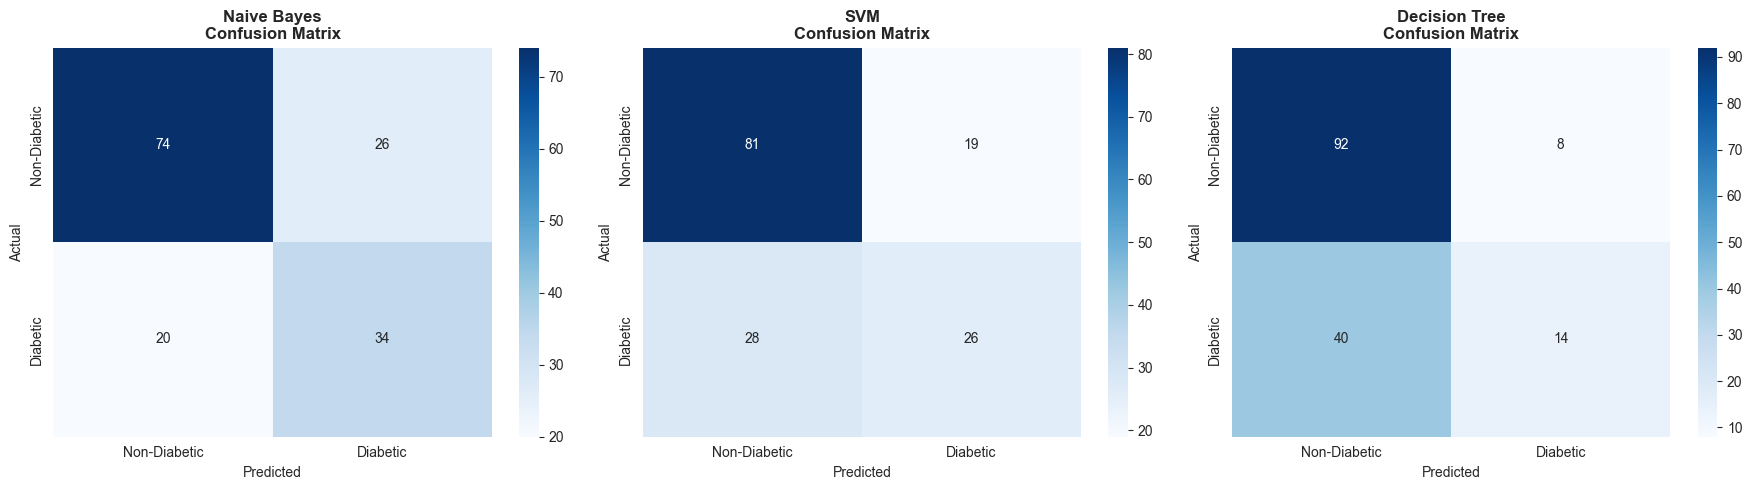


✓ Confusion matrices saved: results/confusion_matrices_all.png


In [7]:
print("\n" + "=" * 70)
print("CREATING CONFUSION MATRIX VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(models.items()):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'],
                ax=axes[idx], cbar=True)
    
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=10)
    axes[idx].set_xlabel('Predicted', fontsize=10)

plt.tight_layout()
plt.savefig('results/confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Confusion matrices saved: results/confusion_matrices_all.png")

## Individual Plots


CREATING INDIVIDUAL CONFUSION MATRICES


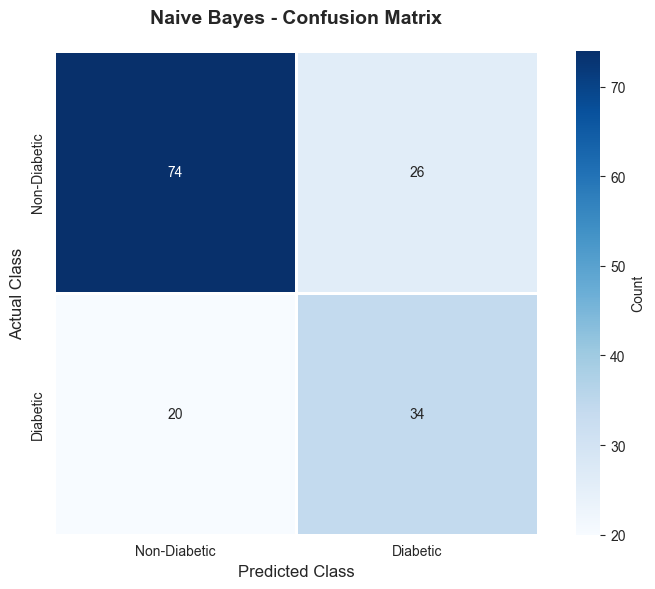

✓ Saved: results/confusion_matrix_Naive_Bayes.png


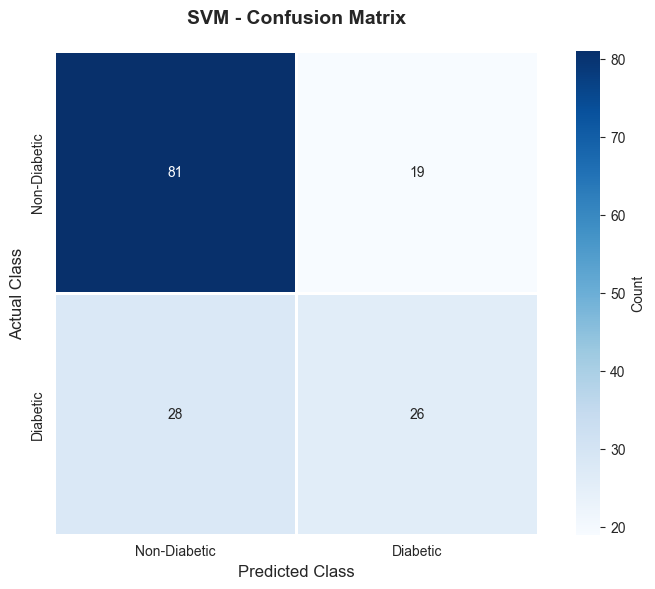

✓ Saved: results/confusion_matrix_SVM.png


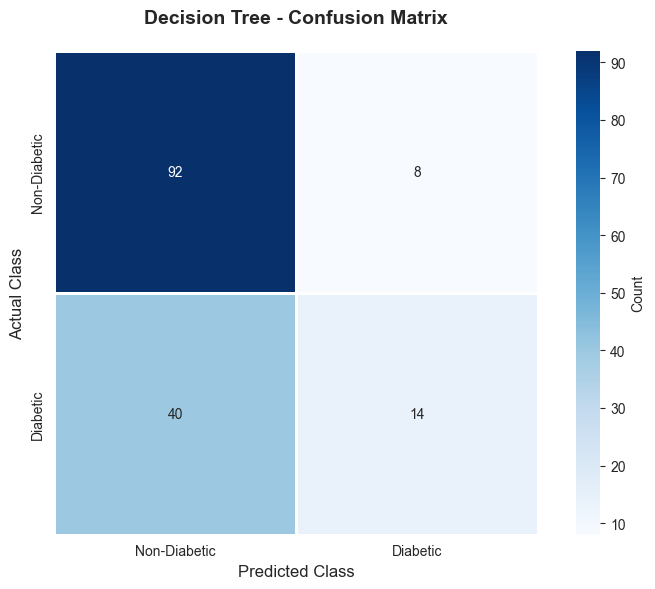

✓ Saved: results/confusion_matrix_Decision_Tree.png


In [8]:
print("\n" + "=" * 70)
print("CREATING INDIVIDUAL CONFUSION MATRICES")
print("=" * 70)

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'],
                square=True, linewidths=1, cbar_kws={'label': 'Count'})
    
    plt.title(f'{name} - Confusion Matrix', fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('Actual Class', fontsize=12)
    plt.xlabel('Predicted Class', fontsize=12)
    
    # Save individual plot
    filename = f"results/confusion_matrix_{name.replace(' ', '_')}.png"
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: {filename}")

## Summary Table

In [10]:
print("\n" + "=" * 70)
print("COMPARATIVE ANALYSIS - ALL MODELS")
print("=" * 70)

# Convert to DataFrame
results_df = pd.DataFrame(evaluation_results)

# Display full table
print("\n")
print(results_df.to_string(index=False))

# Save results
results_df.to_csv('results/evaluation_results.csv', index=False)
print("\n✓ Results saved: results/evaluation_results.csv")


COMPARATIVE ANALYSIS - ALL MODELS


        Model  Accuracy  Precision   Recall  F1-Score  True Negatives  False Positives  False Negatives  True Positives
  Naive Bayes  0.701299   0.566667 0.629630  0.596491              74               26               20              34
          SVM  0.694805   0.577778 0.481481  0.525253              81               19               28              26
Decision Tree  0.688312   0.636364 0.259259  0.368421              92                8               40              14

✓ Results saved: results/evaluation_results.csv


## Performance Bar Chart


CREATING PERFORMANCE COMPARISON CHART


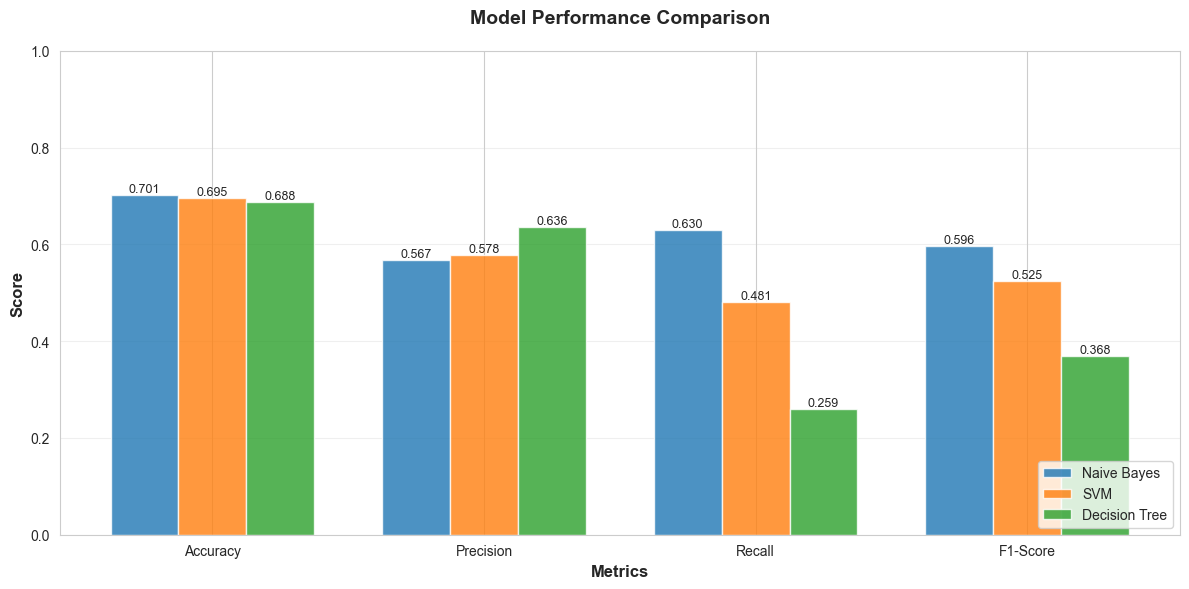


✓ Chart saved: results/performance_comparison.png


In [11]:
print("\n" + "=" * 70)
print("CREATING PERFORMANCE COMPARISON CHART")
print("=" * 70)

# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.25

# Plot bars for each model
for i, row in results_df.iterrows():
    offset = width * (i - 1)
    values = [row['Accuracy'], row['Precision'], row['Recall'], row['F1-Score']]
    bars = ax.bar(x + offset, values, width, label=row['Model'], alpha=0.8)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Chart saved: results/performance_comparison.png")

## ROC Curves


CREATING ROC CURVES


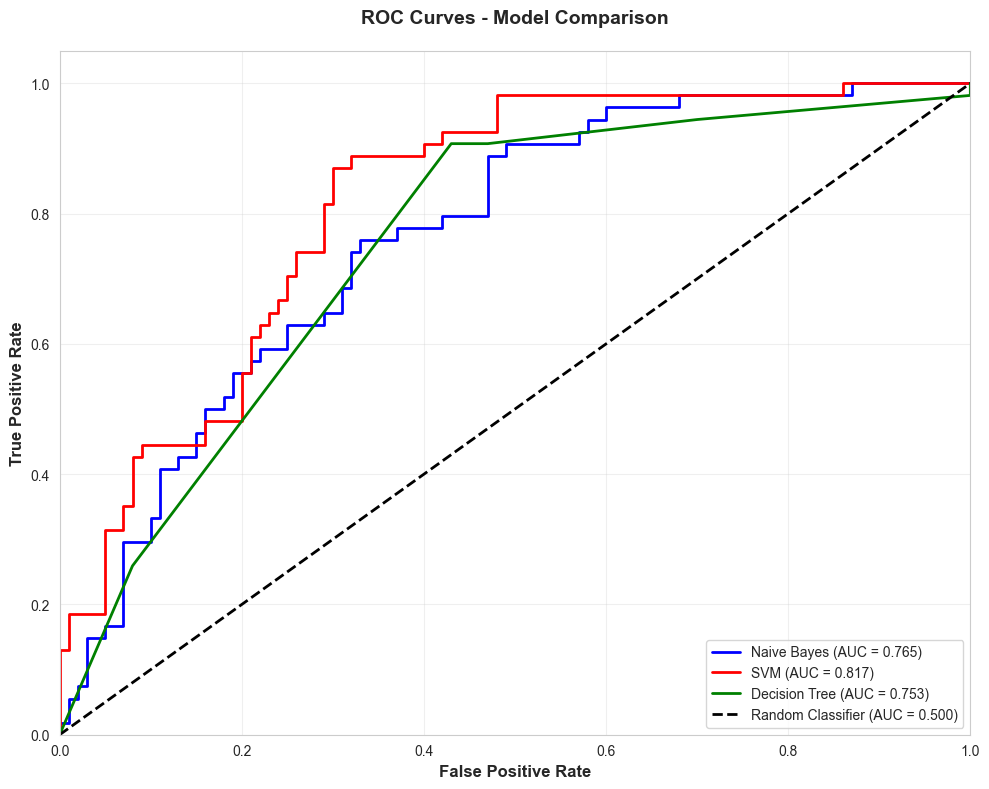


✓ ROC curves saved: results/roc_curves.png


In [12]:
print("\n" + "=" * 70)
print("CREATING ROC CURVES")
print("=" * 70)

plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green']

for idx, (name, model) in enumerate(models.items()):
    # Get probability predictions
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM without probability
        y_proba = model.decision_function(X_test)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, color=colors[idx], lw=2, 
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('results/roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ ROC curves saved: results/roc_curves.png")

## Best Model

In [13]:
print("\n" + "=" * 70)
print("BEST MODEL SELECTION")
print("=" * 70)

# Find best model based on F1-Score (best balance)
best_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_row = results_df.loc[best_idx]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print("=" * 70)
print(f"\nPerformance Metrics:")
print(f"  • Accuracy:  {best_row['Accuracy']:.4f} ({best_row['Accuracy']*100:.2f}%)")
print(f"  • Precision: {best_row['Precision']:.4f} ({best_row['Precision']*100:.2f}%)")
print(f"  • Recall:    {best_row['Recall']:.4f} ({best_row['Recall']*100:.2f}%)")
print(f"  • F1-Score:  {best_row['F1-Score']:.4f} ({best_row['F1-Score']*100:.2f}%)")

print(f"\nConfusion Matrix Breakdown:")
print(f"  • True Negatives:  {best_row['True Negatives']}")
print(f"  • False Positives: {best_row['False Positives']}")
print(f"  • False Negatives: {best_row['False Negatives']}")
print(f"  • True Positives:  {best_row['True Positives']}")

print(f"\n💡 Why This Model Was Selected:")
print(f"  The {best_model_name} achieved the highest F1-Score, indicating")
print(f"  the best balance between precision and recall. This is critical")
print(f"  in medical diagnosis where both false positives and false negatives")
print(f"  have significant consequences.")

# Save best model separately
best_model = models[best_model_name]
joblib.dump(best_model, 'models/best_model.pkl')
print(f"\n✓ Best model saved: models/best_model.pkl")


BEST MODEL SELECTION

🏆 BEST MODEL: Naive Bayes

Performance Metrics:
  • Accuracy:  0.7013 (70.13%)
  • Precision: 0.5667 (56.67%)
  • Recall:    0.6296 (62.96%)
  • F1-Score:  0.5965 (59.65%)

Confusion Matrix Breakdown:
  • True Negatives:  74
  • False Positives: 26
  • False Negatives: 20
  • True Positives:  34

💡 Why This Model Was Selected:
  The Naive Bayes achieved the highest F1-Score, indicating
  the best balance between precision and recall. This is critical
  in medical diagnosis where both false positives and false negatives
  have significant consequences.

✓ Best model saved: models/best_model.pkl


## Performance Dashboard



CREATING PERFORMANCE DASHBOARD


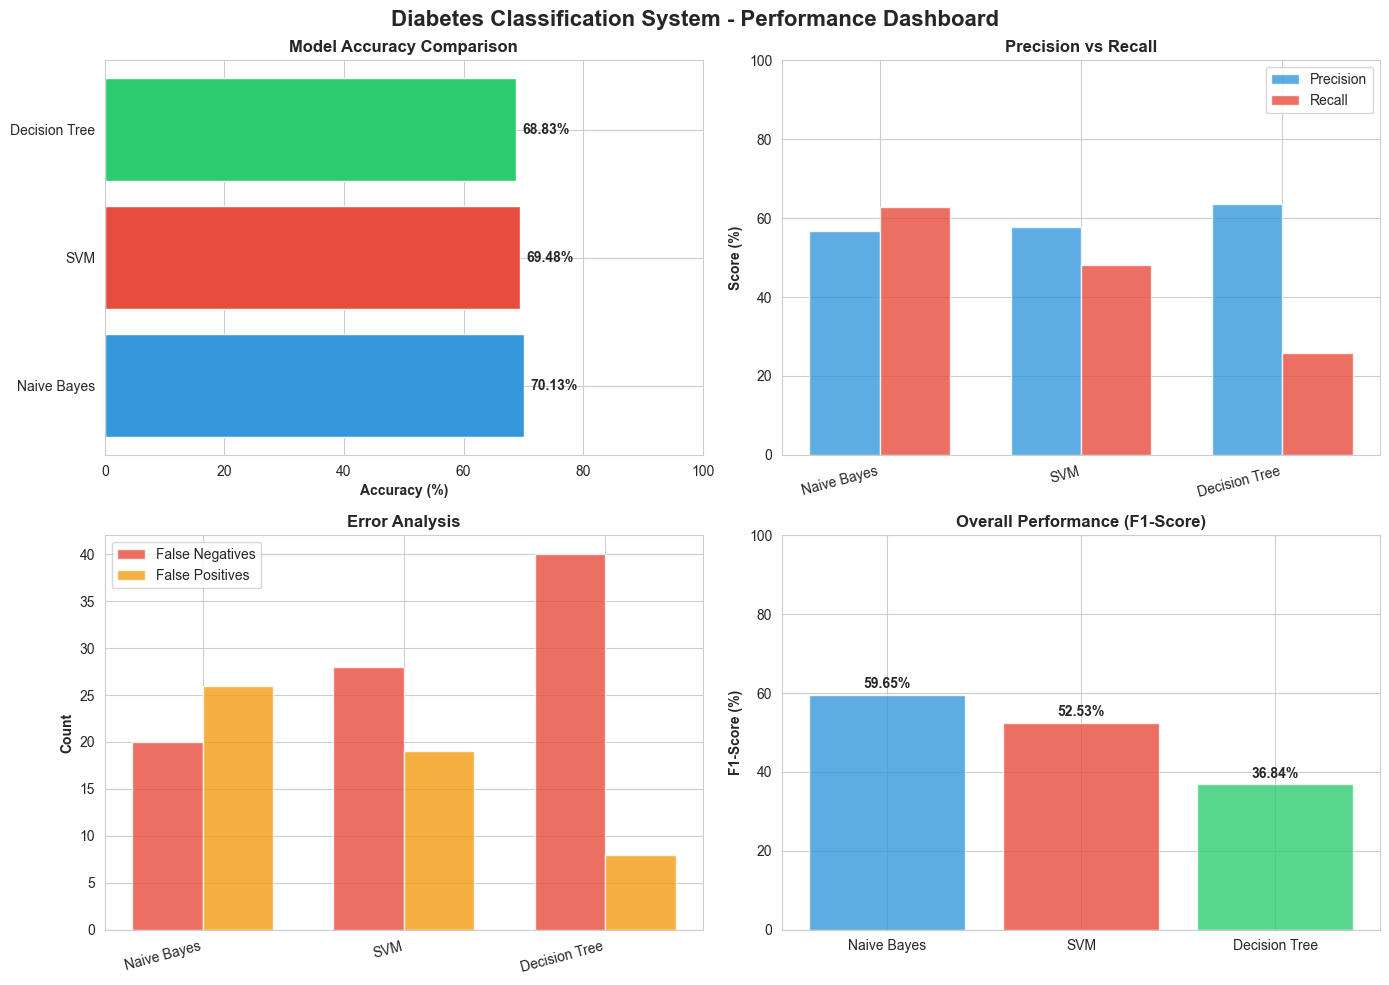


✓ Dashboard saved: results/performance_dashboard.png


In [14]:
print("\n" + "=" * 70)
print("CREATING PERFORMANCE DASHBOARD")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Diabetes Classification System - Performance Dashboard', 
             fontsize=16, fontweight='bold')

# 1. Accuracy Comparison (Top Left)
ax1 = axes[0, 0]
models_list = results_df['Model']
accuracy = results_df['Accuracy'] * 100
colors_bar = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax1.barh(models_list, accuracy, color=colors_bar)
ax1.set_xlabel('Accuracy (%)', fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontweight='bold')
ax1.set_xlim(0, 100)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{width:.2f}%', va='center', fontweight='bold')

# 2. Precision vs Recall (Top Right)
ax2 = axes[0, 1]
precision = results_df['Precision'] * 100
recall = results_df['Recall'] * 100
x_pos = range(len(models_list))
width = 0.35
ax2.bar([i - width/2 for i in x_pos], precision, width, 
        label='Precision', color='#3498db', alpha=0.8)
ax2.bar([i + width/2 for i in x_pos], recall, width, 
        label='Recall', color='#e74c3c', alpha=0.8)
ax2.set_ylabel('Score (%)', fontweight='bold')
ax2.set_title('Precision vs Recall', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models_list, rotation=15, ha='right')
ax2.legend()
ax2.set_ylim(0, 100)

# 3. Error Analysis (Bottom Left)
ax3 = axes[1, 0]
fn = results_df['False Negatives']
fp = results_df['False Positives']
x_pos = range(len(models_list))
width = 0.35
ax3.bar([i - width/2 for i in x_pos], fn, width, 
        label='False Negatives', color='#e74c3c', alpha=0.8)
ax3.bar([i + width/2 for i in x_pos], fp, width, 
        label='False Positives', color='#f39c12', alpha=0.8)
ax3.set_ylabel('Count', fontweight='bold')
ax3.set_title('Error Analysis', fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models_list, rotation=15, ha='right')
ax3.legend()

# 4. F1-Score Overall Performance (Bottom Right)
ax4 = axes[1, 1]
f1_scores = results_df['F1-Score'] * 100
bars = ax4.bar(models_list, f1_scores, color=colors_bar, alpha=0.8)
ax4.set_ylabel('F1-Score (%)', fontweight='bold')
ax4.set_title('Overall Performance (F1-Score)', fontweight='bold')
ax4.set_ylim(0, 100)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('results/performance_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Dashboard saved: results/performance_dashboard.png")

## Summary

In [15]:
print("\n" + "=" * 70)
print("=" * 70)

print("\n📊 Generated Files:")
print("  ✓ results/evaluation_results.csv")
print("  ✓ results/confusion_matrices_all.png")
print("  ✓ results/confusion_matrix_Naive_Bayes.png")
print("  ✓ results/confusion_matrix_SVM.png")
print("  ✓ results/confusion_matrix_Decision_Tree.png")
print("  ✓ results/performance_comparison.png")
print("  ✓ results/roc_curves.png")
print("  ✓ results/performance_dashboard.png")
print("  ✓ models/best_model.pkl")

print("\n🏆 Best Model Summary:")
print(f"  Model: {best_model_name}")
print(f"  Accuracy: {best_row['Accuracy']*100:.2f}%")
print(f"  F1-Score: {best_row['F1-Score']*100:.2f}%")

print("\n📈 All Models Performance:")
for _, row in results_df.iterrows():
    print(f"  • {row['Model']:15s}: {row['F1-Score']*100:.2f}% F1-Score")

print("\n🎯 Next Step: Phase 6 - Deployment & Documentation")
print("   Create prediction system and final project report!")

print("\n" + "=" * 70)



📊 Generated Files:
  ✓ results/evaluation_results.csv
  ✓ results/confusion_matrices_all.png
  ✓ results/confusion_matrix_Naive_Bayes.png
  ✓ results/confusion_matrix_SVM.png
  ✓ results/confusion_matrix_Decision_Tree.png
  ✓ results/performance_comparison.png
  ✓ results/roc_curves.png
  ✓ results/performance_dashboard.png
  ✓ models/best_model.pkl

🏆 Best Model Summary:
  Model: Naive Bayes
  Accuracy: 70.13%
  F1-Score: 59.65%

📈 All Models Performance:
  • Naive Bayes    : 59.65% F1-Score
  • SVM            : 52.53% F1-Score
  • Decision Tree  : 36.84% F1-Score

🎯 Next Step: Phase 6 - Deployment & Documentation
   Create prediction system and final project report!

